# Jonathan Halverson
# Tuesday, February 16, 2016
# Geometric distribution

### The geometric distribution describes the probability of observing the first success on the nth trial. The probability mass fraction is geom.pmf(k) = p(1-p)^(k-1)

In [1]:
from scipy.stats import geom

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

### What is the probability of rolling a 4 for the first time on the 4th roll of a dice? We begin with a numerical simulation: 

In [3]:
successes = 0
trials = 1000000
for _ in xrange(trials):
    d1 = random.choice(range(1, 7))
    d2 = random.choice(range(1, 7))
    d3 = random.choice(range(1, 7))
    d4 = random.choice(range(1, 7))
    if (d1 != 4 and d2 != 4 and d3 !=4 and d4 == 4): successes += 1
print float(successes) / trials

0.096575


### The exact solution is given by the geometic distribution: 

In [4]:
geom.pmf(k=4, p=1/6.0)

0.096450617283950629

### This is equivalent is rolling three die and not get 4 (with p=5/6) and then getting 4 on the last with p=1/6:

In [5]:
(1/6.0)*(5/6.0)**3

0.09645061728395063

### The expectation value or mean is mu = 1 / p = 6. Frank wants to roll a die until it comes up 4 at which point he will stop. What is the probability that he can stop after 6 rolls? Answer: after 1 roll he can quit with p1=1/6, after two rolls p = p1 + p2 = 1/6 + (5/6)(1/6), etc.

In [6]:
sum([geom.pmf(k, p=1/6.0) for k in range(1, 7)])

0.66510202331961588

### One can also use the cumulative distribution function: 

In [7]:
geom.cdf(6, p=1/6.0)

0.66510202331961588

### Here's the numerical simulation:

In [8]:
successes = 0
trials = 1000000
for _ in xrange(trials):
    for _ in xrange(6):
        if (random.choice(range(1, 7)) == 4):
            successes += 1
            break
print float(successes) / trials

0.664663


### The plot below shows the probability of getting a 4 on the last roll only: 

<Container object of 14 artists>

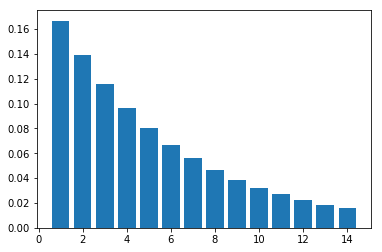

In [9]:
plt.bar(range(1, 15), [geom.pmf(k, p=1/6.0) for k in range(1, 15)], align='center')

### The CDF or probability of getting a 4 within k rolls: 

<Container object of 14 artists>

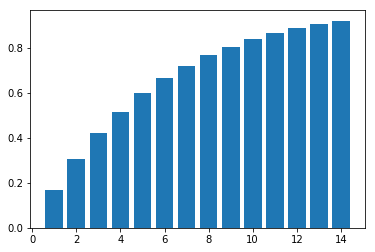

In [10]:
plt.bar(range(1, 15), [geom.cdf(k, p=1/6.0) for k in range(1, 15)], align='center')

# Binomial distribution 

### The binomial distribution describes the probability of having exactly k successes in n independent Bernoulli trials with probability of a success p. The probability mass function is binom.pmf(k) = choose(n, k) p**k (1-p)**(n-k). The most popular example is flipping a fair or unfair coin. For instance, what is the probability of getting 77 heads in 100 flips of a fair coin? 

In [11]:
from scipy.stats import binom
binom.pmf(k=77, n=100, p=0.5)

1.9615239642356016e-08

### Check for normalization: 

In [12]:
sum([binom.pmf(k=k, n=100, p=0.5) for k in range(1, 101)])

0.99999999999997125

### The probability of someone willing to give a strong shock to another is p = 0.35. If four people are chosen at random, what is the probability that only one is willing?

In [13]:
binom.pmf(k=1, n=4, p=0.35)

0.38447500000000001

###The plot below shows the probability of k heads in 100 coin flips: 

<Container object of 100 artists>

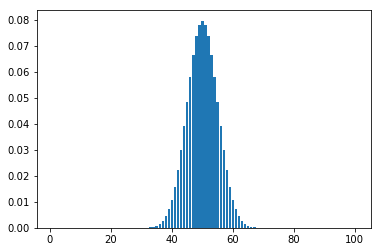

In [14]:
plt.bar(range(1, 101), [binom.pmf(k, n=100, p=0.5) for k in range(1, 101)], align='center')

# Poission distribution

### The Poisson distribution is useful for estimating the number of events in a large population over a unit of time. The probability mass function is poisson.pmf(k) = exp(-mu) * mu**k / k!. The number of heart attacks in NYC per day follows a Poission distribution with mean or rate of 4.4.

In [15]:
from scipy.stats import poisson

In [16]:
poisson.pmf(k=4, mu=4.2)

0.19442365170822168

<Container object of 15 artists>

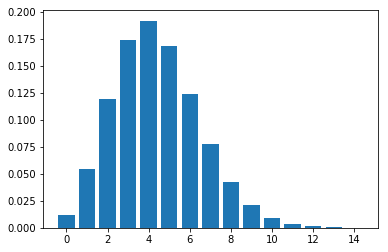

In [17]:
plt.bar(range(15), [poisson.pmf(k, mu=4.4) for k in range(15)], align='center')

### Note that k can take on k=0 

# Chi squared distribution

### chi2.pdf(x, df) = 1 / (2*gamma(df/2)) * (x/2)**(df/2-1) * exp(-x/2)

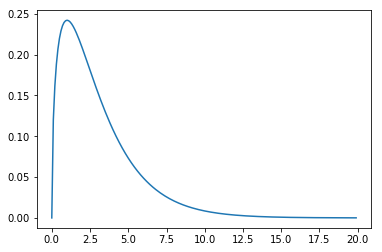

In [18]:
from scipy.stats import chi2
x = np.arange(0, 20, 0.1)
lines = plt.plot(x, chi2.pdf(x, 3))